# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
from numpy import cov
from sklearn.linear_model import LinearRegression
import statsmodels.api as smf

In [2]:
# Your code here.
student_data = pd.DataFrame({'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

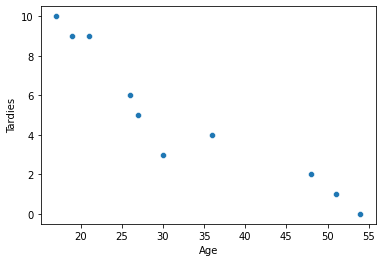

In [3]:
# Your code here.
sns.scatterplot(x=student_data["Age"],y=student_data["Tardies"]);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 

Yes, indeed from the scatter plot we can see a few trends:
- the *younger* the students, the later they arrive to class
- the *older* de students, the sooner they arrive (fewer tardies incidences)

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
covariance = cov(student_data["Age"],student_data["Tardies"])
covariance

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

- The covariance tells us the relationship between both columns (or variables) "Age" and "Tardies".
- In this case, the **covariance** is negative 45.566, which indicates that the relationship between both variables is negative, meaning that they change in opposite directions.

In [6]:
# Applying the correlation formula
corr = (-45.56666667)/((187.65555556)*(12.54444444))**.5
corr

-0.9391626889126637

In [7]:
# Another way
corre = student_data.corr()
corre

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


- The sign of the **correlation** coefficient represents the direction of the relationship.
- In this case, since it's negative, it means that both variables move in opposite directions. In other words, when one variable increases the other decreases. Since the coefficient is -0.93, it is close to be perfectly negatively corrrelated (-1).

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

#### Method Scikit-learn

In [20]:
# Your response here.
lr = LinearRegression(fit_intercept=True)

In [34]:
rm = lr.fit(student_data["Age"].to_frame(),student_data["Tardies"])
rm

LinearRegression()

In [36]:
m = lr.coef_
m

array([-0.24282077])

In [37]:
b = lr.intercept_
b

12.888803363135771

Plot your regression model on your scatter plot.

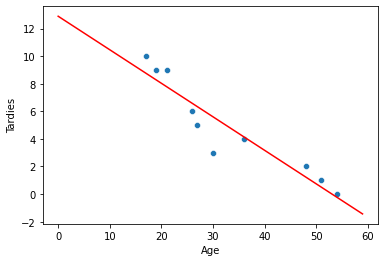

In [51]:
x = np.arange(0,60,1)
y = m*x + b

sns.scatterplot(x=student_data["Age"],y=student_data["Tardies"]);
plt.plot(x,y, c="r");

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
# Your response here. 

- Taking into account the covariance and the correlation, we have seen that the variables "Age" and "Tardies" are related, and on top of that, the relationship is negative (whilst one increases, the other decreases).
- In this regression model, we can indeed see that both variables are related, as the red line indicates us

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
# Import any libraries you may need & the data

In [33]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [54]:
vehicles2 = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]
vehicles2.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


In [55]:
# Your response here.
corr = vehicles2.corr()
corr

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


- "Fuel Barrels/Year" will be the most important in determining CO2 emissions, since it is the variable with the highest positive correlation (0.986)
- "Year" will be the least relevant in providing information since it has the lowest correlation coefficient (-0.222)

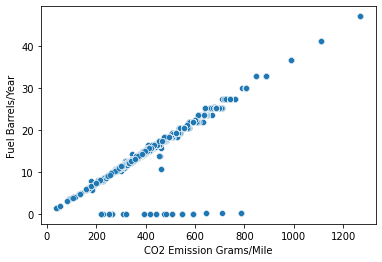

In [58]:
sns.scatterplot(x=vehicles2["CO2 Emission Grams/Mile"],y=vehicles2["Fuel Barrels/Year"]);

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [59]:
# Your response here. 
lr = LinearRegression(fit_intercept=True)

In [60]:
rm = lr.fit(vehicles2["CO2 Emission Grams/Mile"].to_frame(),vehicles2["Fuel Barrels/Year"])
rm

LinearRegression()

In [61]:
m = lr.coef_
m

array([0.03700281])

In [62]:
b = lr.intercept_
b

0.021013852496846397

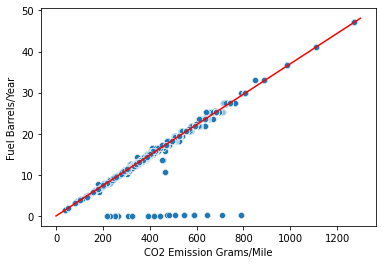

In [63]:
x = np.arange(0,1300,1)
y = m*x + b

sns.scatterplot(x=vehicles2["CO2 Emission Grams/Mile"],y=vehicles2["Fuel Barrels/Year"]);
plt.plot(x,y, c="r");

- I am using the **linear regression model**. I could have chosen another one, but the reason why I went for this particular model is because since "Fuel Barrels/Year" is the variable with the strongest correlation to "CO2 Emission Grams/Mile", I wanted to represent their relationship exclusively.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [65]:
# Your response here. 
lrm = smf.OLS(vehicles2["CO2 Emission Grams/Mile"],vehicles2["Fuel Barrels/Year"])

In [66]:
res = lrm.fit()

In [68]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.998
Model:                                 OLS   Adj. R-squared (uncentered):              0.998
Method:                      Least Squares   F-statistic:                          2.164e+07
Date:                     Mon, 23 Nov 2020   Prob (F-statistic):                        0.00
Time:                             21:45:29   Log-Likelihood:                     -1.5864e+05
No. Observations:                    35952   AIC:                                  3.173e+05
Df Residuals:                        35951   BIC:                                  3.173e+05
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    26.9498      0.006   4651.565      0.000      26.938      26.961
==============================================================================
Omnibus:                    89555.105   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1022572329.320
Skew:                          27.472   Prob(JB):                         0.00
Kurtosis:                     827.382   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation:
- When we represent the model we can indeed see the strong relationship between the two variables, as the positive correlation coefficient was previously indicating.
- Moreover, it is also important to underline the fact that there are a few values far away from the regression line.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [73]:
# Your code here.
df = pd.DataFrame({"X":[1,3,4,6,8,9,11,14], "Y":[1,2,4,4,5,7,8,13]})
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

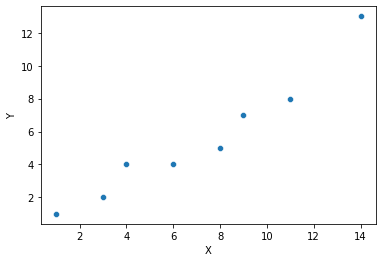

In [77]:
# Your code here.
sns.scatterplot(x=df["X"], y=df["Y"]);

In [76]:
lr = LinearRegression(fit_intercept=True)

rm = lr.fit(df["X"].to_frame(),df["Y"])

m = lr.coef_

b = lr.intercept_

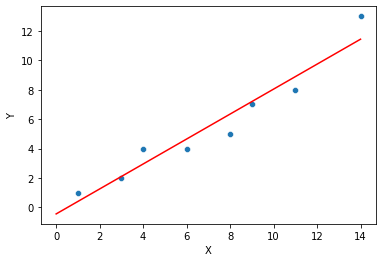

In [78]:
x = np.arange(0,15)
y = m*x + b

sns.scatterplot(x=df["X"], y=df["Y"]);
plt.plot(x,y, c="r");

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [17]:
# Your response here. 

- This tells us many things. To begin with, both variables are related and that relationship is oriented in the same direction (meaning that the relationship is positive).
- On top of that, we can see that most points are close to the to the line, meaning that the difference between the real values and the predicted values is not very big.
- However, there is a point (X=14) that is further away from the rest, which might indicate that it is an anomaly.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [18]:
# Your response here. 

- As I mentioned previously, there is an anomaly or outlier (X=14). This point can cause a problem since it might influence the conclusions draw from analising this dataset.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [19]:
# Your response here. 